In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
import os, sys
from google.colab import drive
drive.mount('/content/mnt')
nb_path = '/content/notebooks'
os.symlink('/content/mnt/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0, nb_path)
cd /content/mnt/My Drive/Colab Notebooks/

In [ ]:
import pathlib
data_dir = pathlib.Path('/content/mnt/My Drive/Colab Notebooks/2021DevMatchingData/train/train')
count = len(list(data_dir.glob('*/*.jpg')))
count
train_data_dir = pathlib.Path('/content/mnt/My Drive/Colab Notebooks/2021DevMatchingData/train/train')
test_data_dir = pathlib.Path('/content/mnt/My Drive/Colab Notebooks/2021DevMatchingData/test/test')

1698

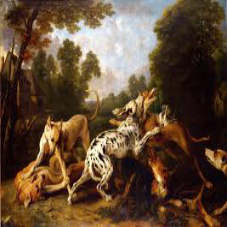

In [ ]:
dogs = list(data_dir.glob('dog/*.jpg'))
PIL.Image.open(str(dogs[0]))

In [ ]:
batch_size = 32
img_height = 227
img_width = 227

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 1698 files belonging to 7 classes.
Using 1359 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1698 files belonging to 7 classes.
Using 339 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['dog', 'elephant', 'giraffe', 'guitar', 'horse', 'house', 'person']


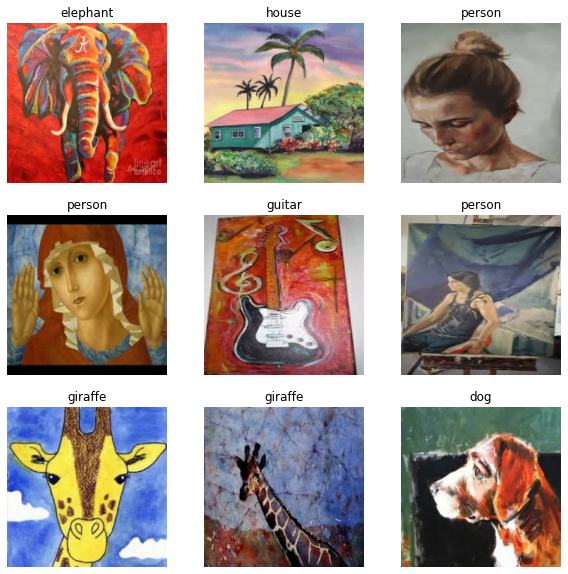

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.9803922


In [ ]:
num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_12 (Rescaling)     (None, 227, 227, 3)       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 227, 227, 16)      448       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 113, 113, 16)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 113, 113, 32)      4640      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 28, 28, 64)       

In [ ]:
epochs=30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
6/6 [==============================] - 7s 871ms/step - loss: nan - accuracy: 0.1715 - val_loss: nan - val_accuracy: 0.1652
Epoch 2/30
6/6 [==============================] - 1s 201ms/step - loss: nan - accuracy: 0.1927 - val_loss: nan - val_accuracy: 0.1652
Epoch 3/30
6/6 [==============================] - 1s 201ms/step - loss: nan - accuracy: 0.2107 - val_loss: nan - val_accuracy: 0.1652
Epoch 4/30
6/6 [==============================] - 1s 199ms/step - loss: nan - accuracy: 0.2111 - val_loss: nan - val_accuracy: 0.1652
Epoch 5/30
6/6 [==============================] - 1s 200ms/step - loss: nan - accuracy: 0.2050 - val_loss: nan - val_accuracy: 0.1652
Epoch 6/30
6/6 [==============================] - 1s 201ms/step - loss: nan - accuracy: 0.1893 - val_loss: nan - val_accuracy: 0.1652
Epoch 7/30
6/6 [==============================] - 1s 202ms/step - loss: nan - accuracy: 0.2133 - val_loss: nan - val_accuracy: 0.1652
Epoch 8/30
6/6 [==============================] - 1s 202ms/ste

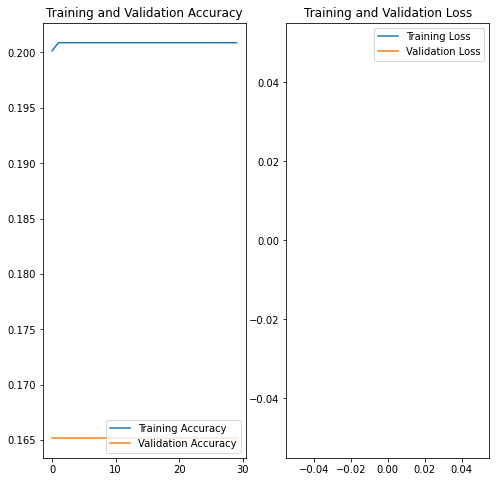

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

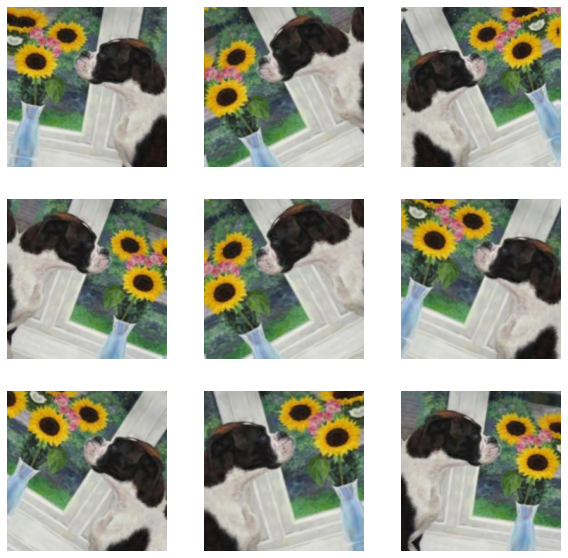

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_7 (Sequential)    (None, 227, 227, 3)       0         
_________________________________________________________________
rescaling_10 (Rescaling)     (None, 227, 227, 3)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 227, 227, 16)      448       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 113, 113, 16)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 113, 113, 32)      4640      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 56, 56, 64)       

In [ ]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
22/22 [==============================] - 2s 80ms/step - loss: nan - accuracy: 0.1645 - val_loss: nan - val_accuracy: 0.1652
Epoch 2/15
22/22 [==============================] - 1s 60ms/step - loss: nan - accuracy: 0.2075 - val_loss: nan - val_accuracy: 0.1652
Epoch 3/15
22/22 [==============================] - 1s 60ms/step - loss: nan - accuracy: 0.2024 - val_loss: nan - val_accuracy: 0.1652
Epoch 4/15
22/22 [==============================] - 1s 60ms/step - loss: nan - accuracy: 0.1980 - val_loss: nan - val_accuracy: 0.1652
Epoch 5/15
22/22 [==============================] - 1s 60ms/step - loss: nan - accuracy: 0.2031 - val_loss: nan - val_accuracy: 0.1652
Epoch 6/15
22/22 [==============================] - 1s 61ms/step - loss: nan - accuracy: 0.2015 - val_loss: nan - val_accuracy: 0.1652
Epoch 7/15
22/22 [==============================] - 1s 60ms/step - loss: nan - accuracy: 0.1985 - val_loss: nan - val_accuracy: 0.1652
Epoch 8/15
22/22 [==============================] - 1s 

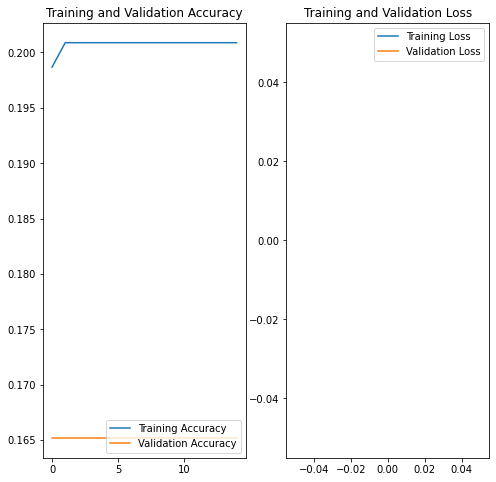

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()